# Introducción a Filtros Digitales
- [Introducción](#introducción)
- [Aplicaciones de filtros digitales](#aplicaciones-de-filtros-digitales)
- [Tipos de filtros digitales](#tipos-de-filtros-digitales)
- [Diseño de filtros digitales](#diseño-de-filtros-digitales)
- [Implementación de filtros digitales en Python](#implementación-de-filtros-digitales-en-python)

## Introducción

En ingeniería electrónica, un filtro es un sistema que permite manipular el contenido en frecuencia de una señal de acuerdo a los requerimientos establecidos. Por ejemplo, un filtro puede ser utilizado para amplificar o atenuar un rango de frecuencias, o bien para eliminar o aislar un componente en frecuencia específico.

Los filtros se suelen componer de varios elementos, entre los que destacan:
- Magnitud:
    - Valor que representa la ganancia del componente en frecuencia.
    - Usualmente denotado en $dB$.
    - Cuando es 0 se busca mantener intacto el componente en frecuencia.
    - Cuando es menor a 0 se busca atenuar el componente en frecuencia.
    - Cuando es mayor a 1 se busca amplificar el componente en frecuencia.
    - Usualmente se denota como $H_\omega$.
- Banda de paso:
    - Rango de frecuencias que se busca mantener o amplificar.
- Banda de rechazo:
    - Rango de frecuencias que se busca atenuar.
- Frecuencia de corte:
    - Valor o valores en los que se presenta un cambio entre banda de paso y rechazo.
    - Este valor está determinado por la frecuencia en la que se consigue una magnitud de $-3 db$.
    - Usualmente se denota como $\omega_{c}$.


Caracteristicas
-  Alta inmunidad al ruido 
-  Alta precisión, limitada por los errores de redondeo en la aritmética empleada 
-  Fácil modificación de las características del filtro
-   Muy bajo costo

## Aplicaciones de filtros digitales

- Procesamiento de audio: Los filtros digitales se utilizan en aplicaciones de procesamiento de audio, como la mejora de la calidad de sonido, la eliminación de ruido y la ecualización.
- Comunicaciones: Los filtros digitales son esenciales en la transmisión de datos y señales de voz en sistemas de comunicaciones.
- Imágenes: Se utilizan filtros digitales en aplicaciones de procesamiento de imágenes para mejorar la claridad, reducir el ruido y realizar operaciones como la detección de bordes.
- Análisis de señales: Los filtros digitales se utilizan en aplicaciones de análisis de señales para extraer información útil de una señal y para reducir el ruido y la interferencia.
- Control de sistemas: Los filtros digitales se utilizan en sistemas de control para modelar y controlar la dinámica de sistemas reales.
- Procesamiento de señales médicas: Los filtros digitales se utilizan en aplicaciones médicas para procesar y analizar señales médicas, como electrocardiogramas.

## Tipos de filtros digitales

### Clasificación según bandas de paso
La principal clasificación de los filtros digitales se basa en los intervalos de su banda de paso, en la cual existen 4 filtros principales.

Este sistema de clasificación aplica igual para los filtros analógicos.

#### Filtro pasa bajas
- Cuenta con una única frecuencia de corte ($\omega_{c}$).
- Su banda de paso es el intervalo [0, $\omega_{c}$).
- Su banda de rechazo es el intervalo [$\omega_{c}$, $\infty$).

<img src="./figures/pasa_baja.png" width="400">

#### Filtro pasa altas
- Cuenta con una única frecuencia de corte ($\omega_{c}$).
- Su banda de paso es el intervalo ($\omega_{c}$, $\infty$).
- Su banda de rechazo es el intervalo [0, $\omega_{c}$].

<img src="./figures/pasa_alta.png" width="400">

#### Filtro pasa banda
- Cuenta con dos frecuencias de corte ($\omega_{c1}$ y $\omega_{c2}$).
- Su banda de paso es el intervalo ($\omega_{c1}$, $\omega_{c2}$).
- Sus bandas de rechazo son los intervalos [0, $\omega_{c1}$] y [$\omega_{c2}$, $\infty$).

<img src="./figures/pasa_banda.png" width="400">

#### Filtro rechaza banda
- Cuenta con dos frecuencias de corte ($\omega_{c1}$ y $\omega_{c2}$).
- Sus bandas de paso son los intervalos [0, $\omega_{c1}$) y ($\omega_{c2}$, $\infty$).
- Su banda de rechazo es el intervalo [$\omega_{c1}$, $\omega_{c2}$].

<img src="./figures/rechaza_banda.png" width="400">

>Observación: Las figuras mostradas anteriormente muestran la respuesta en frecuencia de filtros ideales, sin embargo, más adelante observaremos que los filtros reales presentan ligeros cambios respecto a los ideales.

### Clasificación según tipo de respuesta al impulso
Otra clasificación de los filtros digitales toma como referencia el tipo de respuesta al impulso que tiene cada filtro.

#### Respuesta al impulso infinita (IIR)
Los filtros de respuesta al impulso infinita (también llamados recursivos) suelen conseguir implementaciones con orden de filtro mucho menor, sin embargo presentan una fase no lineal.

Tiene como función de transferencia:

$H(z) = \frac{b(1) + b(2)z^{-1} + ... + b(m+1)z^{-M}}{1+ a(2)z^{-1} + ... + a(n+1)z^{-N}} $

Caracteristicas
-	Es recursivo, o sea, que su salida además de las entradas depende de las salidas pasadas. 
-	Tiene polos y ceros, tiene problemas de estabilidad. 
-	La fase no es lineal con la frecuencia 
-	El orden del filtro es mucho menor que un filtro FIR para la misma aplicación


#### Respuesta al impulso finita (FIR)
Los filtros de respuesta al impulso finita (también llamados no recursivos)

Tiene como función de transferencia:

$H(z) = b(1) + b(2) z^{-1} + ⋯ + b(m+1)z^{-M}$

Caracteristicas: 

- La secuencia b(k) son los coeficientes del filtro 
- Es no recursivo, o sea, la salida depende solamente de las entradas y no de las salidas pasadas 
- La función de transferencia sólo tiene ceros, excelente estabilidad.
- Suelen requerir un orden de filtro mucho más alto que los filtros IIR para alcanzar un determinado nivel de rendimiento


## Diseño de filtros digitales

En general, el filtro está diseñado en base a especificaciones principalmente para la banda de paso, la banda de rechazo y la banda de transición de la respuesta de frecuencia del filtro. 

- Banda de paso del filtro es el rango de frecuencias en la que un filtro permite el paso de la señal sin atenuación significativa. 
- Banda de rechazo del filtro se define como el rango de frecuencia sobre el cual se atenúa la respuesta de magnitud del filtro para eliminar la señal de entrada cuyos componentes de frecuencia están dentro de ese rango. 
- Banda de transición denota el rango de frecuencia entre la banda de paso y la banda de rechazo. 

<img src="./figures/c_Filtro.png" width="400">

Donde:
La frecuencia de corte ωp define el límite superior de la banda de paso.
La frecuencia de corte ωs designa el comienzo de la banda eliminada. 
Por tanto, la anchura de la banda de transición es ωs − ωp. La anchura de la banda de paso normalmente se denomina ancho de banda del filtro. 

Si existe rizado en la banda de paso del filtro, su valor se designa mediante δ1, y el módulo |H(ω)|,respuesta de amplitud, varía entre los límites 1±δ1. El rizado de la banda eliminada del filtro se designa como δ2.

Para acomodar un rango dinámico grande en la gráfica de la respuesta en frecuencia de cualquier filtro, es habitual utilizar una escala logarítmica para el módulo |H(ω)|. En consecuencia, el rizado en la banda de paso es 20log10 δ1 decibelios, y en la banda eliminada es 20log10 δ2.

En cualquier problema de diseño de filtros podemos especificar: 
- el rizado máximo de la banda de paso tolerable
- el rizado máximo de la banda eliminada tolerable 
- la frecuencia de corte de la banda de paso ωp 
- la frecuencia de corte de la banda eliminada ωs. 

Basándonos en estas especificaciones, podemos seleccionar los parámetros {ak} y {bk} de la respuesta en frecuencia, que proporcionen la mejor aproximación a la especificación deseada. El grado en que H(ω) se aproxime a la especificación depende en parte de los criterios utilizados para seleccionar los coeficientes del filtro {ak} y {bk}, así como de las cantidades (M,N) de coeficientes.

### Diseño de filtros IIR

$H(z) =\frac{B(z)}{A(z)} = \frac{b(1)+b(2)z^{-1} + ... + b(n+1)z^{-n}}{1 + a(2)z^{-1} + ... + a(n+1)z^{-n}} $

Filtro Butterworth

Caracteristicas:

- La respuesta de amplitud disminuye suavemente desde la banda de paso hasta la banda de parada, es decir, se obtiene una atenuación gradual. 
- No presenta picos en la respuesta de amplitud, lo que implica que no hay realce en la banda de paso.
- El filtro tiene una ganancia constante en la banda de paso, pero no necesariamente es plana en toda la banda de paso.
- La frecuencia de corte es donde la magnitud del filtro es $|H(jΩ)|= \frac{sqrt(2)}{2}=0.707$ en  Ω=1. Esto se refiere a la frecuencia en la cual la respuesta de amplitud del filtro ha disminuido su valor en 3 dB (decibeles) respecto a su valor en la banda de paso máxima, es decir, es el punto en el que la ganancia de la señal se ha reducido a aproximadamente 0.707 veces (equivalente a -3 dB) de la ganancia en la banda de paso.


<img src="./figures/Filtro_Butterworth.png" width="400">

Filtro Chebyshev Tipo I

Caracteristicas:
- Minimiza la diferencia entre el ideal y la respuesta de frecuencia actual sobre la banda de paso incorporando un equiriple de Rp dB (picos) en la banda de paso. Cuanto mayor sea el valor de Rp, más pronunciados serán los picos en la respuesta de amplitud.
- La transición de la banda de paso a la banda de rechazo es más rápida que en el de Butterworth.
- La respuesta en la banda rechazo es plana (maximally flat). 
- La frecuencia de corte es donde la magnitud del filtro es $ |H(jΩ)|= 10^{\frac{-Rp}{20}} $ en  $ Ω = 1 $

<img src="./figures/Filtro_Chebyshev.png" width="400">

El orden del filtro es n con frecuencia de corte en la banda de paso normalizada en Wp y R dB de riple pico a pico en la banda de paso.

Filtro Chebyshev Tipo II

Caracteristicas:
- Minimiza la diferencia con el filtro ideal en la banda de rechazo incorporando un equiriple de Rs dB (picos) en la banda de rechazo. 
- La transición de la banda de paso a la banda de rechazo es más rápida que en el de Butterworth.
- La respuesta en la banda de paso es plana (Maximally flat). 
- La frecuencia de corte es donde la magnitud del filtro es $|H(jΩ)| = 10^{\frac{-Rs}{20}}$  en  $Ω = 1$      

<img src="./figures/Filtro_Chebyshev_II.png" width="400">

Filtro Elíptico 

Caracteristicas:
- Atenuación equirriple tanto en banda de paso como en banda de rechazo, es decir, presenta picos en ambas bandas: Riple en la banda de paso (Rp) y Riple en la banda de rechazo (Rs). 
- Tiene la capacidad de lograr una transición más pronunciada y rápida entre la banda de paso y la banda de parada, es decir, minimiza el ancho de la transición.
- La frecuencia de corte es donde la magnitud del filtro es $|H(jΩ)|=10^{\frac{-Rp}{20}}$  en $Ω = 1$


<img src="./figures/Filtro_Eliptico.png" width="400">

### Diseño de filtros FIR

| Método de diseño de filtro | Descripción | 
| --- | --- | 
| Ventanas |  Uno de los métodos de diseño de filtros FIR más simples y fáciles de implementar. Tienden a tener una respuesta en frecuencia limitada por la forma de la ventana utilizada. Tipos de ventanas: Rectangular, Barlett, Hann, Hamming, Blackman, Kaiser. |
| Multibanda con bandas de transición | Método de equiripple o de mínimos cuadrados en las sub-bandas del intervalo de frecuencias. | 
| Mínimos cuadrados restringidos | Minimizar la integral del cuadrado del error en todo el intervalo de frecuencias con restricciones de error máximo. La restricción consiste en que no es necesario definir las bandas de transición.|
| Respuesta arbitraria | Permite diseñar filtro con una respuesta de frecuencia completamente personalizada y arbitraria., incluidos los filtros complejos y de fase no lineal.|
| Coseno alzado | Variante de los filtros FIR con ventana que utiliza una función de coseno alzado para suavizar los bordes de la ventana rectangular.|

https://la.mathworks.com/help/signal/ug/fir-filter-design.html

## Implementación del diseño de filtros en Python

A continuación, se muestran ejemplos de la implementación del diseño de filtros IIR y FIR en Python. Primeramente, es necesario definir las librerias con las cuales se trabajará.

In [2]:
## Librerías
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from pylab import *

#### Filtros IIR

##### Filtro Pasa Bajas

El siguiente código implementa el diseño de un filtro Butterworth analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100), en donde se graficará la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Butterworth.

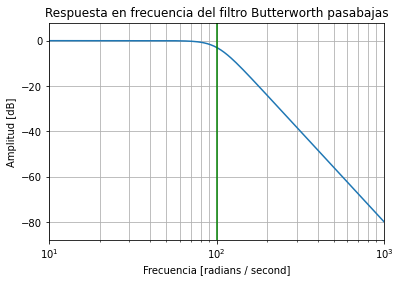

In [12]:
## Filtro Butterworth

# Diseña el filtro Butterworth
b, a = signal.iirfilter(N=4, Wn=100,btype='low', analog=True, ftype='butter')
""" 
Especificaciones del filtro
Donde:
N: Orden del filtro
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).

bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia del filtro Butterworth.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Se realiza la graficación de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
# Etiquetas y detalles en el gráfico
plt.title('Respuesta en frecuencia del filtro Butterworth pasabajas')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') #Línea vertical para marcar la frecuencia de corte
plt.show()

Este código diseñará un filtro digital Butterworth pasabajas de orden 4 con una frecuencia de corte de 100 Hz y una frecuencia de muestreo de 1000 Hz (puedes ajustar la frecuencia de muestreo según tus necesidades). Luego, grafica la respuesta en frecuencia del filtro en decibeles utilizando una escala logarítmica para la frecuencia.

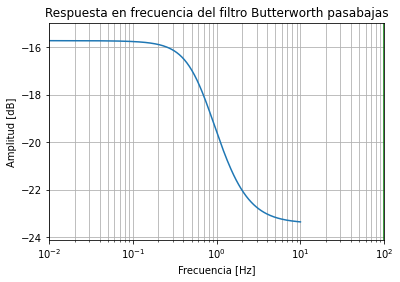

In [14]:
# Filtro Butterworth

# Especificaciones del filtro
Wn = 100  # Frecuencia de corte del filtro en Hz
N = 2 # Orden del filtro
# Diseño del filtro Butterworth utilizando signal.iirfilter
b, a = signal.iirfilter(N, Wn, btype='low', ftype='butter', fs=1000)
# Calculo de la respuesta en frecuencia del filtro Butterworth.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
# Graficar la respuesta en frecuencia en decibeles
plt.figure()
plt.semilogx(w, 20 * np.log10(np.abs(h)))
plt.title('Respuesta en frecuencia del filtro Butterworth pasabajas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both')
# Agregar línea vertical para marcar la frecuencia de corte
plt.axvline(Wn, color='green')
plt.show()

El código implementa el diseño de un filtro Chebyshev Tipo I analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100) y una atenuación de 5 dB en la banda de paso (rp=5), en donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la librería "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo I.

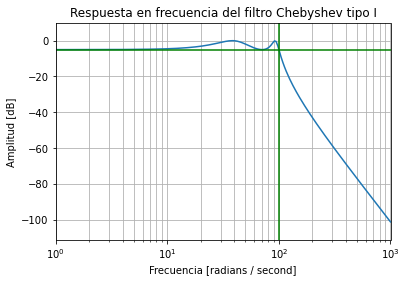

In [26]:
## Filtro Chebyshev Tipo I

b, a = signal.iirfilter(N=4, Wn=100,rp = 5,btype='low', analog=True, ftype='cheby1')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para filtros digitales, Wn están en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
rp: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda pasante. (dB)
bytpe: El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
# Etiquetas y detalles al gráfico:
plt.title('Respuesta en frecuencia del filtro Chebyshev tipo I')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') # Línea vertical para marcar la frecuencia de corte
plt.axhline(-5, color='green') # Línea horizontal para marcar la atenuación en la banda de paso
plt.show()

El código que proporcionas implementa el diseño de un filtro Chebyshev Tipo II analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100) y una atenuación de 40 dB en la banda de rechazo (rs=40). Luego, grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y librería "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II.

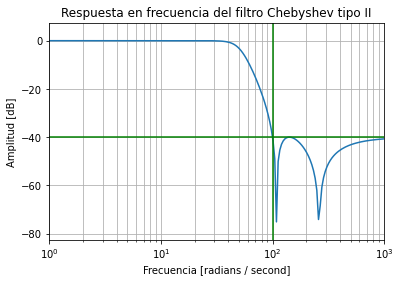

In [19]:
## Filtro Chebyshev Tipo II

b, a = signal.iirfilter(N=4, Wn=100,rs = 40,btype='low', analog=True, ftype='cheby2')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Por tanto, Wn está en semiciclos/muestra).
rs: Para filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de parada. (dB)
bytpe: El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.

"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro Chebyshev tipo II')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') # Línea vertical para marcar la frecuencia de corte
plt.axhline(-40, color='green') # Línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.show()

El código que proporcionas implementa el diseño de un filtro elíptico analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100), una atenuación de 5 dB en la banda de paso (rp=5) y una atenuación de 40 dB en la banda de rechazo (rs=40). Luego, grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la librería matplotlib. Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro elíptico.

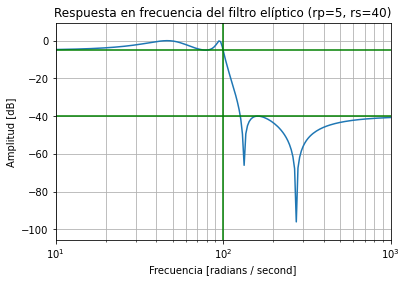

In [18]:
## Filtro Elliptico

b, a = signal.iirfilter(N=4, Wn=100, rp=5,rs=40,btype='low', analog=True, ftype='ellip')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
rp: Para filtros Chebyshev y elípticos, proporciona la máxima ondulación en la banda pasante. (dB)
rs: Para los filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de paso. (dB)
bytpe: El tipo de filtro, paso banda, paso bajo, paso alto, banda de parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro elíptico (rp=5, rs=40)')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') # línea vertical para marcar la frecuencia de corte
plt.axhline(-40, color='green') # línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.axhline(-5, color='green') # línea horizontal para marcar la atenuación en la banda de paso (rp)
plt.show()

##### Filtro Pasa Altas

El código implementa el diseño de un filtro Butterworth analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100) y tipo de filtro pasa-altos (btype='high'), en donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la libreria "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Butterworth pasa-altos.

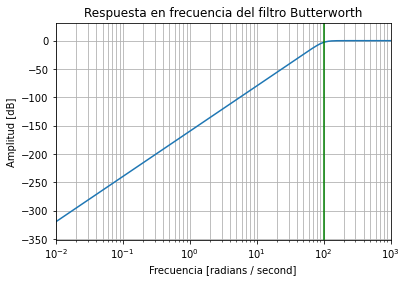

In [17]:
## Filtro Butterworth

b, a = signal.iirfilter(N=4, Wn=100,btype='high', analog=True, ftype='butter')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
bytpe:El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro Butterworth')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') # agrega una línea vertical verde en el gráfico para marcar la frecuencia de corte del filtro.
plt.show()

El código que proporcionas implementa el diseño de un filtro Chebyshev Tipo I analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100), una atenuación de 5 dB en la banda de paso (rp=5) y tipo de filtro pasa-altos (btype='high'), donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la libreria "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo I pasa-altos.


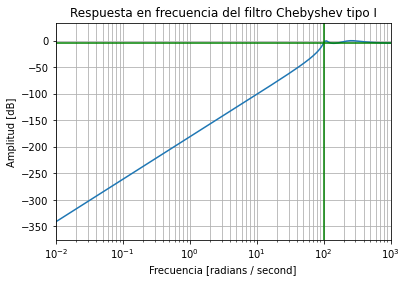

In [22]:
## Filtro Chebyshev Tipo I

b, a = signal.iirfilter(N=4, Wn=100,rp = 5,btype='high', analog=True, ftype='cheby1')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
rp: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda pasante. (dB)
bytpe: El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro Chebyshev tipo I')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') #Agrega líneas verticales en el gráfico para marcar la frecuencia de corte
plt.axhline(-5, color='green') #Agrega líneas horizontales en el gráfico para marcar la atenuación en la banda de paso (rp) 
plt.show()

El código que proporcionas implementa el diseño de un filtro Chebyshev Tipo II analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100), una atenuación de 40 dB en la banda de paso (rs=40) y tipo de filtro pasa-altos (btype='high'), donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la libreria "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II pasa-altos.

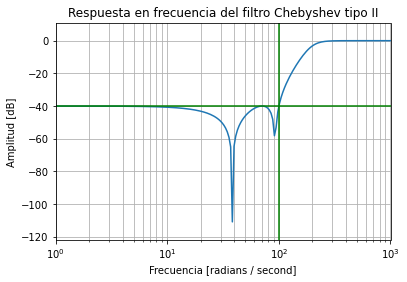

In [23]:
## Filtro Chebyshev Tipo II 

b, a = signal.iirfilter(N=4, Wn=100,rs = 40,btype='high', analog=True, ftype='cheby2')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Por tanto, Wn está en semiciclos/muestra).
rs: Para filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de parada. (dB)
bytpe: El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro Chebyshev tipo II')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') #Agrega líneas verticales en el gráfico para marcar la frecuencia de corte
plt.axhline(-40, color='green') #Agrega líneas horizontales en el gráfico para marcar la atenuación en la banda de paso (rp) 
plt.show()

El código implementa el diseño de un filtro elíptico analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100), una atenuación de 5 dB en la banda de paso (rp=5) y una atenuación de 40 dB en la banda de rechazo (rs=40), además de ser un filtro pasa-altos (btype='high'). Posteriormente, se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la libreria "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro elíptico.

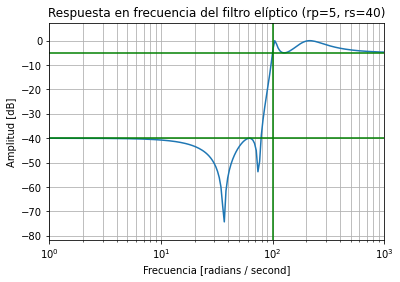

In [24]:
## Filtro Elliptico

b, a = signal.iirfilter(N=4, Wn=100, rp=5,rs=40,btype='high', analog=True, ftype='ellip')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
rp: Para filtros Chebyshev y elípticos, proporciona la máxima ondulación en la banda pasante. (dB)
rs: Para los filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de paso. (dB)
bytpe: El tipo de filtro, paso banda, paso bajo, paso alto, banda de parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
w: Las frecuencias angulares a las que se ha calculado h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(abs(h))"
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro elíptico (rp=5, rs=40)')
plt.xlabel('Frecuencia [radians / second]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(100, color='green') # Agrega líneas verticales en el gráfico para marcar la frecuencia de corte
plt.axhline(-40, color='green') #plt.axhline(-40, color='green') # Línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.axhline(-5, color='green') #Agrega líneas horizontales en el gráfico para marcar la atenuación en la banda de paso (rp)
plt.show()

##### Filtro Pasa Bandas

El código implementa el diseño de un filtro Chebyshev Tipo II analógico de orden 17 (N=17) con frecuencia de corte en un rango de 50 Hz a 200 Hz (Wn=[2np.pi50, 2np.pi200]), una atenuación de 60 dB en la banda de rechazo (rs=60) y tipo de filtro pasa-banda (btype='band'). Luego, calcula y grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II pasa-banda.

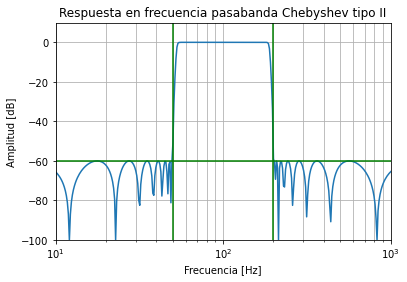

In [25]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 17.

b, a = signal.iirfilter(N=17,Wn= [2*np.pi*50, 2*np.pi*200], rs=60,btype='band', analog=True, ftype='cheby2')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Por tanto, Wn está en semiciclos/muestra).
rs: Para filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de parada. (dB)
bytpe: El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a, 1000)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
worN{None, int, array_like}, opción: Si None, entonces compute en 200 frecuencias alrededor de las partes interesantes de la curva de respuesta (determinadas por la ubicación de los polos cero). 
interesantes de la curva de respuesta (determinadas por la ubicación de los polos cero). Si es un número entero, entonces calcula en 
ese número de frecuencias. En caso contrario, calcula la respuesta en las frecuencias angulares (por ejemplo, rad/s) indicadas en worN.
w: Las frecuencias angulares en las que se calculó h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(np.maximum(abs(h), 1e-5))". 
# La función "np.maximum(abs(h), 1e-5)" evita que la amplitud tome valores muy cercanos a cero, lo que 
# resultaría en valores indefinidos en dB.
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
# Etiquetas y detalles al gráfico
ax.set_title('Respuesta en frecuencia pasabanda Chebyshev tipo II')
ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Amplitud [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(50, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
# de corte inferior del filtro
plt.axvline(200, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
#de corte superior del filtro
plt.axhline(-60, color='green') # Agrega una línea horizontal verde en el gráfico para marcar la atenuación 
#en la banda de rechazo (rs)
plt.show()

##### Filtro Rechaza bandas

El código implementa el diseño de un filtro Chebyshev Tipo II analógico de orden 17 (N=17) con frecuencia de corte en un rango de 50 Hz a 200 Hz (Wn=[2np.pi50, 2np.pi200]), una atenuación de 60 dB en la banda de rechazo (rs=60) y tipo de filtro rechaza bandas (btype='stop'). Luego, calcula y grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II rechaza bandas.

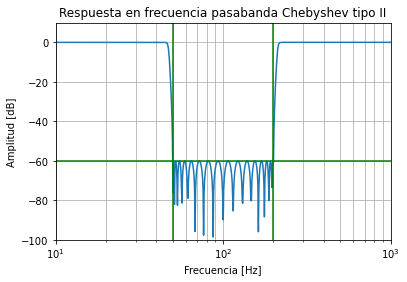

In [27]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 17.

b, a = signal.iirfilter(N=17,Wn= [2*np.pi*50, 2*np.pi*200], rs=60,
                        btype='stop', analog=True, ftype='cheby2')
""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Por tanto, Wn está en semiciclos/muestra).
rs: Para filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de parada. (dB)
bytpe: El tipo de filtro, paso-banda, paso-bajo, paso-alto, banda-parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calculo de la respuesta en frecuencia.
w, h = signal.freqs(b, a, 1000)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
worN{None, int, array_like}, opción: Si None, entonces compute en 200 frecuencias alrededor de las partes interesantes de la curva de respuesta (determinadas por la ubicación de los polos cero). 
interesantes de la curva de respuesta (determinadas por la ubicación de los polos cero). Si es un número entero, entonces calcula en 
ese número de frecuencias. En caso contrario, calcula la respuesta en las frecuencias angulares (por ejemplo, rad/s) indicadas en worN.
w: Las frecuencias angulares en las que se calculó h.
h: La respuesta en frecuencia.
"""
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Grafica de la respuesta de frecuencia en decibeles utilizando "plt.semilogx". 
# La amplitud se convierte a decibeles con la función "20 * np.log10(np.maximum(abs(h), 1e-5))". 
# La función "np.maximum(abs(h), 1e-5)" evita que la amplitud tome valores muy cercanos a cero, 
# lo que resultaría en valores indefinidos en dB.
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Respuesta en frecuencia pasabanda Chebyshev tipo II')
ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Amplitud [dB]')
ax.axis((10, 1000, -100, 10))
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.axvline(50, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
#de corte inferior del filtro
plt.axvline(200, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
#de corte superior del filtro
plt.axhline(-60, color='green') # Agrega una línea horizontal verde en el gráfico para marcar la atenuación en
# la banda de rechazo (rs)

plt.show()

#### Filtros FIR: Método Ventana

##### Filtro Pasa Bajas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana de Hamming. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

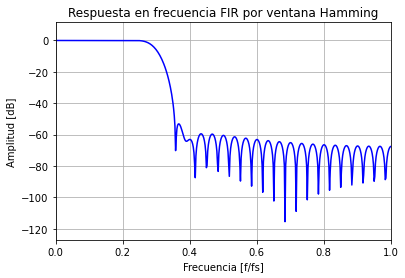

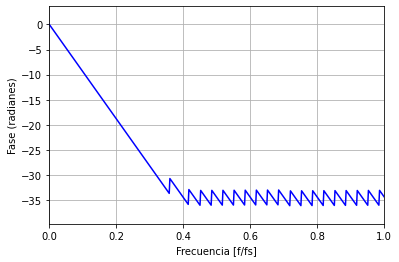

In [41]:
## Filtro Hamming

n  = 61 # Cantidad de coeficientes que se utilizarán para implementar el filtro
fc = 0.3 # Frecuencia de corte normalizada del filtro
# Diseña el filtro FIR utilizando la función "firwin" con la ventana de Hamming como método de diseño
b  = signal.firwin(n, fc, window='hamming') 
# Calcula la respuesta en frecuencia del filtro FIR
w, h = signal.freqz(b)
# Agrega información al gráfico
plt.figure()
plt.plot(w/(max(w)), 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia FIR por ventana Hamming')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [f/fs]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones

plt.figure()
# Calcula y grafica la fase del filtro FIR utilizando "np.angle(h)" y "np.unwrap".
angles = np.unwrap(np.angle(h))
# Agrega información al gráfico
plt.plot(w/(max(w)), angles, 'b')
plt.ylabel('Fase (radianes)')
plt.xlabel('Frecuencia [f/fs]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.show()

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana de Hann. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

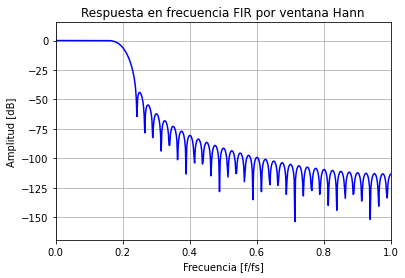

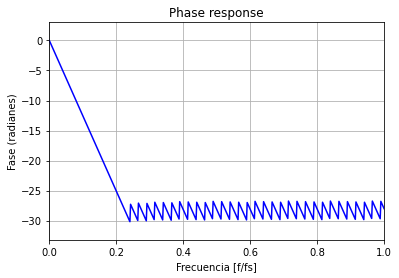

In [37]:
## Filtro Hann

n  = 81 # Cantidad de coeficientes que se utilizarán para implementar el filtro.
fc = 0.2 # Especifica la frecuencia de corte normalizada del filtro.
# Diseña el filtro FIR utilizando la función "firwin" con la ventana de Hann como método de diseño 
b  = signal.firwin(n, fc, window='hann')
# Se utiliza la función "signal.freqz" para calcular la respuesta en frecuencia del filtro FIR.
w, h = signal.freqz(b)
# Agrega información al gráfico
plt.figure()
plt.plot(w/(max(w)), 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia FIR por ventana Hann')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [f/fs]')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones

plt.figure()
# Calcula y grafica la fase del filtro FIR utilizando "np.angle(h)" y "np.unwrap"
angles = np.unwrap(np.angle(h))
plt.plot(w/(max(w)), angles, 'b')
plt.ylabel('Fase (radianes)')
plt.xlabel('Frecuencia [f/fs]')
plt.title('Phase response')
plt.margins(0, 0.1) #Ajustar los márgenes del gráfico en el eje y
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.show()

##### Filtro Pasa Altas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana de Hanning. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

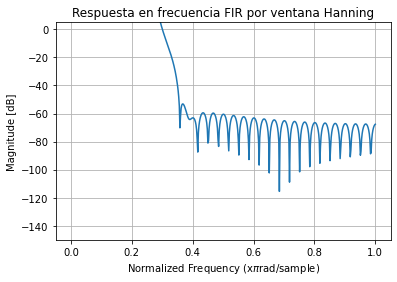

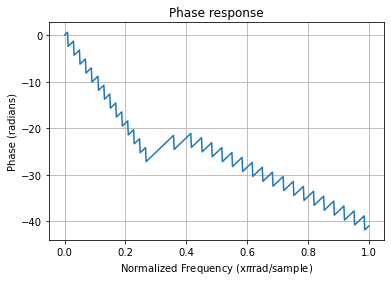

In [42]:
n = 101 # Cantidad de coeficientes que se utilizarán para implementar el filtro
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False)
"""
Donde: 
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica la frecuencia de corte normalizada del filtro. La frecuencia de corte se expresa como 
una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Se utiliza la ventana de Hanning como método de diseño.
"""
# Calcula la respuesta en frecuencia del filtro FIR.
w,h = signal.freqz(b,a)
# Calcula la magnitud en decibeles
h_dB = 20 * log10 (abs(h))
plt.figure()
plt.plot(w/max(w),h_dB)
plt.ylim(-150, 5)
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Respuesta en frecuencia FIR por ventana Hanning')
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.show()

plt.figure()
# Calcula la fase en radianes
h_Phase = unwrap(arctan2(imag(h),real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Phase response')
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.show()

##### Filtro Pasa Bandas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana Blackman-Harris con una longitud de 1001 coeficientes y dos frecuencias de corte: 0.2 y 0.5 veces la frecuencia de muestreo. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

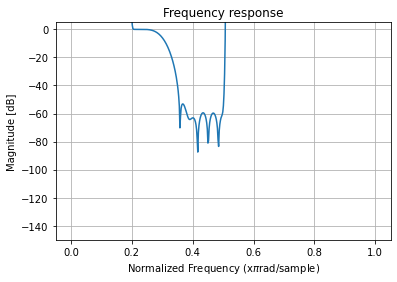

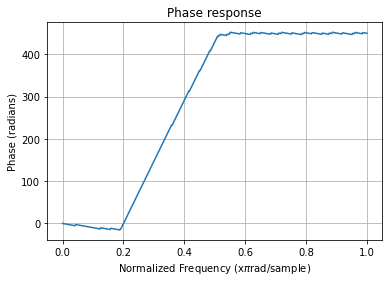

In [55]:
n = 1001
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = False)
"""
Donde:
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica las dos frecuencias de corte normalizadas del filtro. La frecuencia de corte se expresa 
como una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Se utiliza la ventana de Blackman-Harris como método de diseño.
pass_zero=False: 
Indica que el filtro es un filtro de paso-banda, es decir, permite el paso de frecuencias dentro del rango 
especificado.

"""
# Calcula la respuesta en frecuencia del filtro FIR.
w,h = signal.freqz(b,a)
# Calcula la magnitud en decibeles 
h_dB = 20 * log10 (abs(h))
plt.figure()
plt.plot(w/max(w),h_dB)
plt.ylim(-150, 5)
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Frequency response')
plt.grid(which='both', axis='both')
plt.show()

plt.figure()
# Calcula la fase en radianes
h_Phase = unwrap(arctan2(imag(h),real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Phase response')
plt.grid(which='both', axis='both') #Agrega líneas de cuadrícula en ambas direcciones
plt.show()

##